# TCC - BASE 2 - Regressão
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [ ]:
import nltk
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import scale
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns

import graphs

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
data = pd.read_csv('BASE2_ETAPA3_v1.csv', encoding="ISO-8859-1", nrows=None, sep=';')
data.head()

MATERIAL_CORPO    MATERIAL_INTERNOS  ... id   VALOR
0   AC ASTM A105  OBTUR-SEDE AISI 410  ...  1  229.24
1   AC ASTM A105  OBTUR-SEDE AISI 410  ...  2  252.58
2   AC ASTM A105  OBTUR-SEDE AISI 410  ...  3  262.71
3   AC ASTM A105  OBTUR-SEDE AISI 410  ...  4  252.58
4   AC ASTM A105  OBTUR-SEDE AISI 410  ...  5  252.59

[5 rows x 16 columns]

*Análise exploratória da base*

In [ ]:
data.shape

(5746, 16)

In [ ]:
data.columns

Index(['MATERIAL_CORPO', 'MATERIAL_INTERNOS', 'ACABAMENTO_FACE_FLANGE',
       'ADAPTA_CORPO_TAMPA', 'CLASSE_MATERIAL_CORPO', 'DIAMETRO_NOMINAL',
       'EXTREMIDADE_CONEX', 'FAIXA_DIAMETRO_PGBF', 'FORMA_CONSTRUTIVA_HASTE',
       'PADRAO_FABRICA', 'REQUISITOS_SUPLEMENT', 'TIPO_ACIONADOR',
       'TIPO_OBTURADOR', 'CLASSE_PRESSAO', 'id', 'VALOR'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATERIAL_CORPO           5746 non-null   object 
 1   MATERIAL_INTERNOS        5746 non-null   object 
 2   ACABAMENTO_FACE_FLANGE   5746 non-null   object 
 3   ADAPTA_CORPO_TAMPA       5746 non-null   object 
 4   CLASSE_MATERIAL_CORPO    5746 non-null   object 
 5   DIAMETRO_NOMINAL         5746 non-null   float64
 6   EXTREMIDADE_CONEX        5746 non-null   object 
 7   FAIXA_DIAMETRO_PGBF      5746 non-null   object 
 8   FORMA_CONSTRUTIVA_HASTE  5746 non-null   object 
 9   PADRAO_FABRICA           5746 non-null   object 
 10  REQUISITOS_SUPLEMENT     5746 non-null   object 
 11  TIPO_ACIONADOR           5746 non-null   object 
 12  TIPO_OBTURADOR           5746 non-null   object 
 13  CLASSE_PRESSAO           5746 non-null   int64  
 14  id                      

In [ ]:
data.isnull().sum()

MATERIAL_CORPO             0
MATERIAL_INTERNOS          0
ACABAMENTO_FACE_FLANGE     0
ADAPTA_CORPO_TAMPA         0
CLASSE_MATERIAL_CORPO      0
DIAMETRO_NOMINAL           0
EXTREMIDADE_CONEX          0
FAIXA_DIAMETRO_PGBF        0
FORMA_CONSTRUTIVA_HASTE    0
PADRAO_FABRICA             0
REQUISITOS_SUPLEMENT       0
TIPO_ACIONADOR             0
TIPO_OBTURADOR             0
CLASSE_PRESSAO             0
id                         0
VALOR                      0
dtype: int64

## <font color='blue'>Tratamentos dos dados</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [ ]:
data = data.drop(columns=['id'])

*Ajustes nos nomes das colunas*

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()
labels_material_corpo = label_enconder.fit_transform(data.MATERIAL_CORPO)
data['material_corp'] = labels_material_corpo
labels_material_int = label_enconder.fit_transform(data.MATERIAL_INTERNOS)
data['material_int'] = labels_material_int
labels_face_flange = label_enconder.fit_transform(data.ACABAMENTO_FACE_FLANGE)
data['acab_face_flange'] = labels_face_flange
labels_adapta_corpo_tampa = label_enconder.fit_transform(data.ADAPTA_CORPO_TAMPA)
data['adapta_corpo_tampa'] = labels_adapta_corpo_tampa
labels_class_material_corpo = label_enconder.fit_transform(data.CLASSE_MATERIAL_CORPO)
data['class_mat_corpo'] = labels_class_material_corpo
labels_extrem_conex = label_enconder.fit_transform(data.EXTREMIDADE_CONEX)
data['extrem_conex'] = labels_extrem_conex
labels_fx_diametro = label_enconder.fit_transform(data.FAIXA_DIAMETRO_PGBF)
data['fx_diametro'] = labels_fx_diametro
labels_forma_constr_haste = label_enconder.fit_transform(data.FORMA_CONSTRUTIVA_HASTE)
data['forma_haste'] = labels_forma_constr_haste
labels_padrao_fabrica = label_enconder.fit_transform(data.PADRAO_FABRICA)
data['padrao_fabrica'] = labels_padrao_fabrica
labels_req_suplement = label_enconder.fit_transform(data.REQUISITOS_SUPLEMENT)
data['req_suplement'] = labels_req_suplement
labels_tipo_acionador = label_enconder.fit_transform(data.TIPO_ACIONADOR)
data['tipo_acionador'] = labels_tipo_acionador
labels_tipo_obturador = label_enconder.fit_transform(data.TIPO_OBTURADOR)
data['tipo_obturador'] = labels_tipo_obturador

In [ ]:
data = data.drop(['MATERIAL_CORPO', 'MATERIAL_INTERNOS', 'ACABAMENTO_FACE_FLANGE', 'ADAPTA_CORPO_TAMPA', 'CLASSE_MATERIAL_CORPO', 'EXTREMIDADE_CONEX', 'FAIXA_DIAMETRO_PGBF', 'FORMA_CONSTRUTIVA_HASTE', 'PADRAO_FABRICA', 'REQUISITOS_SUPLEMENT', 'TIPO_ACIONADOR', 'TIPO_OBTURADOR'], axis=1)

In [ ]:
data.head()

DIAMETRO_NOMINAL  CLASSE_PRESSAO  ...  tipo_acionador  tipo_obturador
0              0.75             800  ...               2               1
1              0.75             800  ...               2               1
2              0.75             800  ...               2               1
3              0.75             800  ...               2               1
4              0.75             800  ...               2               1

[5 rows x 15 columns]

*Visualização de histograma*

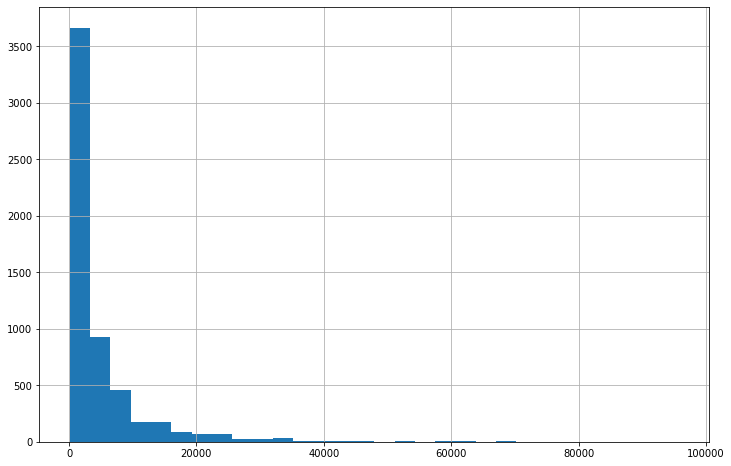

In [ ]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [ ]:
data.head()

DIAMETRO_NOMINAL  CLASSE_PRESSAO  ...  tipo_acionador  tipo_obturador
0              0.75             800  ...               2               1
1              0.75             800  ...               2               1
2              0.75             800  ...               2               1
3              0.75             800  ...               2               1
4              0.75             800  ...               2               1

[5 rows x 15 columns]

In [ ]:
data.shape

(5746, 15)

*Padronizar a base*

In [ ]:
from sklearn.preprocessing import StandardScaler
data_cols = data.columns
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=data_cols)
data.head()

DIAMETRO_NOMINAL  CLASSE_PRESSAO  ...  tipo_acionador  tipo_obturador
0         -0.667452        0.800034  ...        0.287495        0.032331
1         -0.667452        0.800034  ...        0.287495        0.032331
2         -0.667452        0.800034  ...        0.287495        0.032331
3         -0.667452        0.800034  ...        0.287495        0.032331
4         -0.667452        0.800034  ...        0.287495        0.032331

[5 rows x 15 columns]

## <font color='blue'>Modelo de regressão múltipla linear</font>
===================================================================================================================

### <font color='green'>Análise de correlação</font>

*Matriz de correlação*

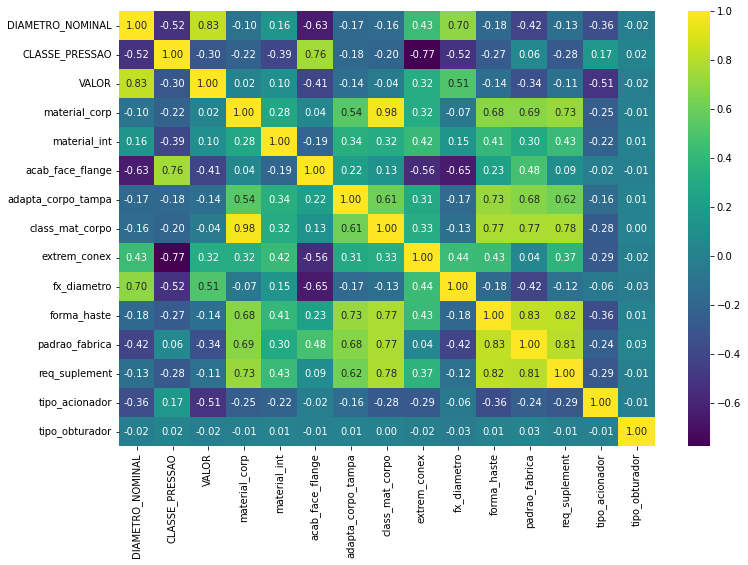

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="viridis", fmt="0.2f");

*Analise de: Diâmetro x Valor*

Text(0, 0.5, 'VALOR')

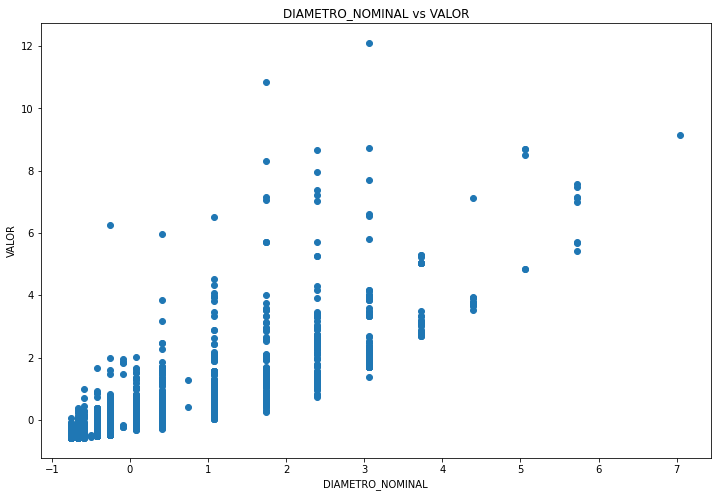

In [ ]:
X = data['DIAMETRO_NOMINAL']
y = data['VALOR']
plt.scatter(x=X, y=y)
plt.title('DIAMETRO_NOMINAL vs VALOR')
plt.xlabel('DIAMETRO_NOMINAL')
plt.ylabel('VALOR')

*Analise de: Classe de pressão x Valor*

Text(0, 0.5, 'VALOR')

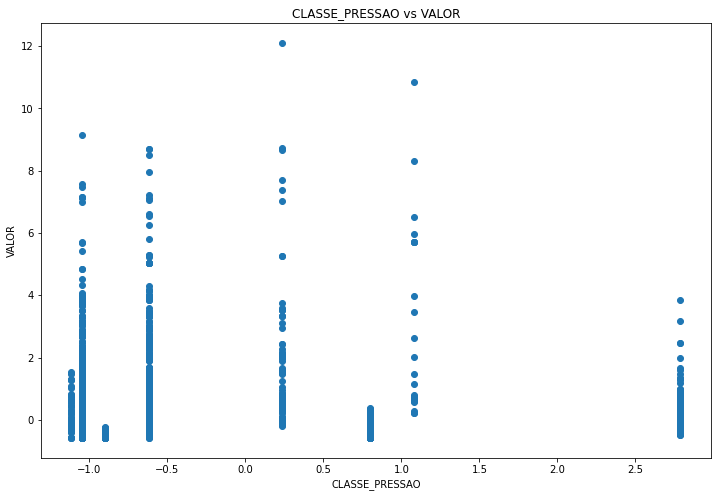

In [ ]:
X = data['CLASSE_PRESSAO']
y = data['VALOR']
plt.scatter(x=X, y=y)
plt.title('CLASSE_PRESSAO vs VALOR')
plt.xlabel('CLASSE_PRESSAO')
plt.ylabel('VALOR')

### <font color='green'>Modelo 1</font>

*Sumário do modelo*

In [ ]:
data1 = data
X = sm.add_constant(data1.drop('VALOR', axis=1))
y = data1['VALOR']
X.sample(5)

const  DIAMETRO_NOMINAL  ...  tipo_acionador  tipo_obturador
4461    1.0         -0.667452  ...        0.287495        0.032331
1917    1.0         -0.252829  ...        0.287495        0.032331
2106    1.0         -0.584527  ...        0.287495        0.032331
4009    1.0         -0.750377  ...        0.287495        0.032331
813     1.0         -0.584527  ...        0.287495        0.032331

[5 rows x 15 columns]

In [ ]:
model1 = sm.OLS(y, X.astype(float)).fit()

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1788.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:44:50   Log-Likelihood:                -3325.7
No. Observations:                5746   AIC:                             6681.
Df Residuals:                    5731   BIC:                             6781.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.744e-16      0

*Gráfico qq*

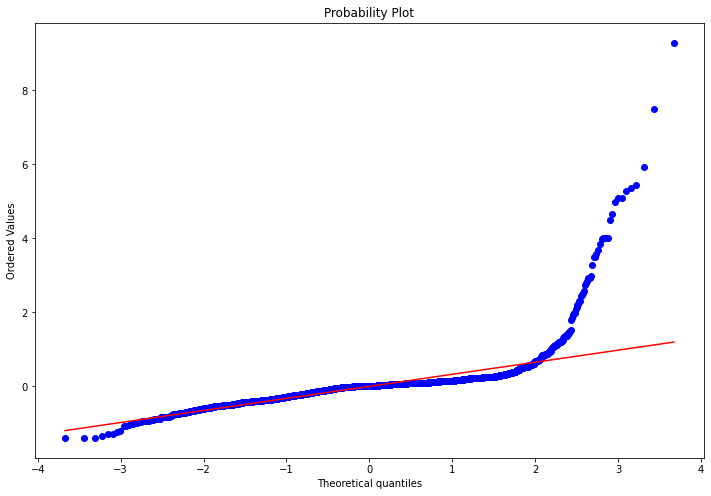

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model1)
graph_plotter.plot_qq()

*Gráfico de resíduos x ajustados*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


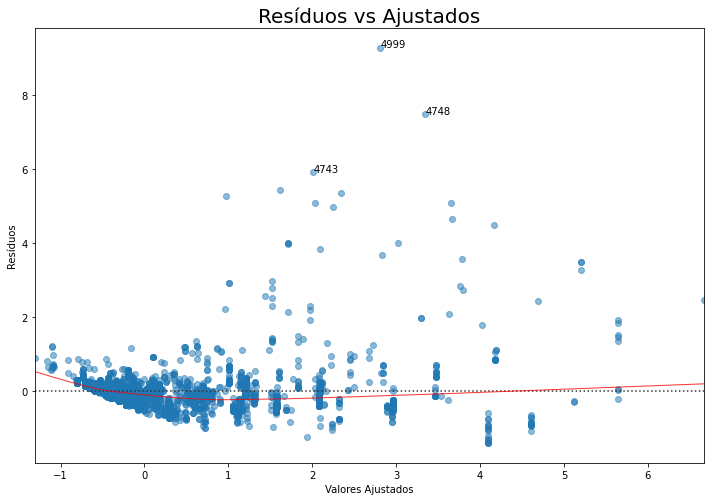

In [ ]:
graph_plotter.plot_residual_fitted_values(y)

*Gráfico de resíduos padronizados*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


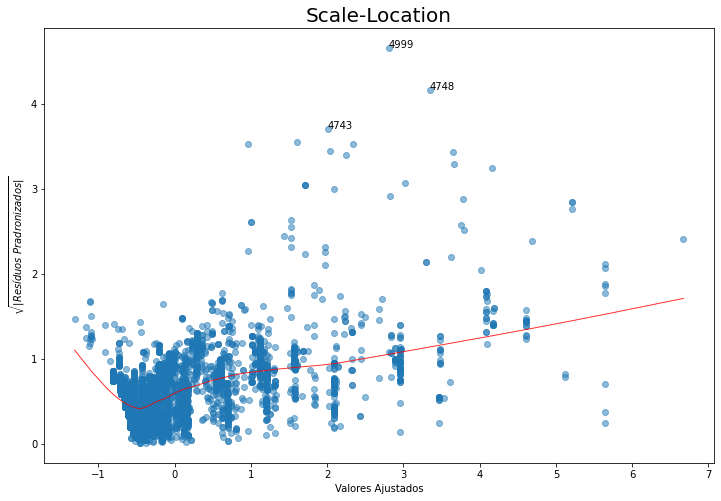

In [ ]:
graph_plotter.plot_scale_location()

*Gráfico de outlier*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


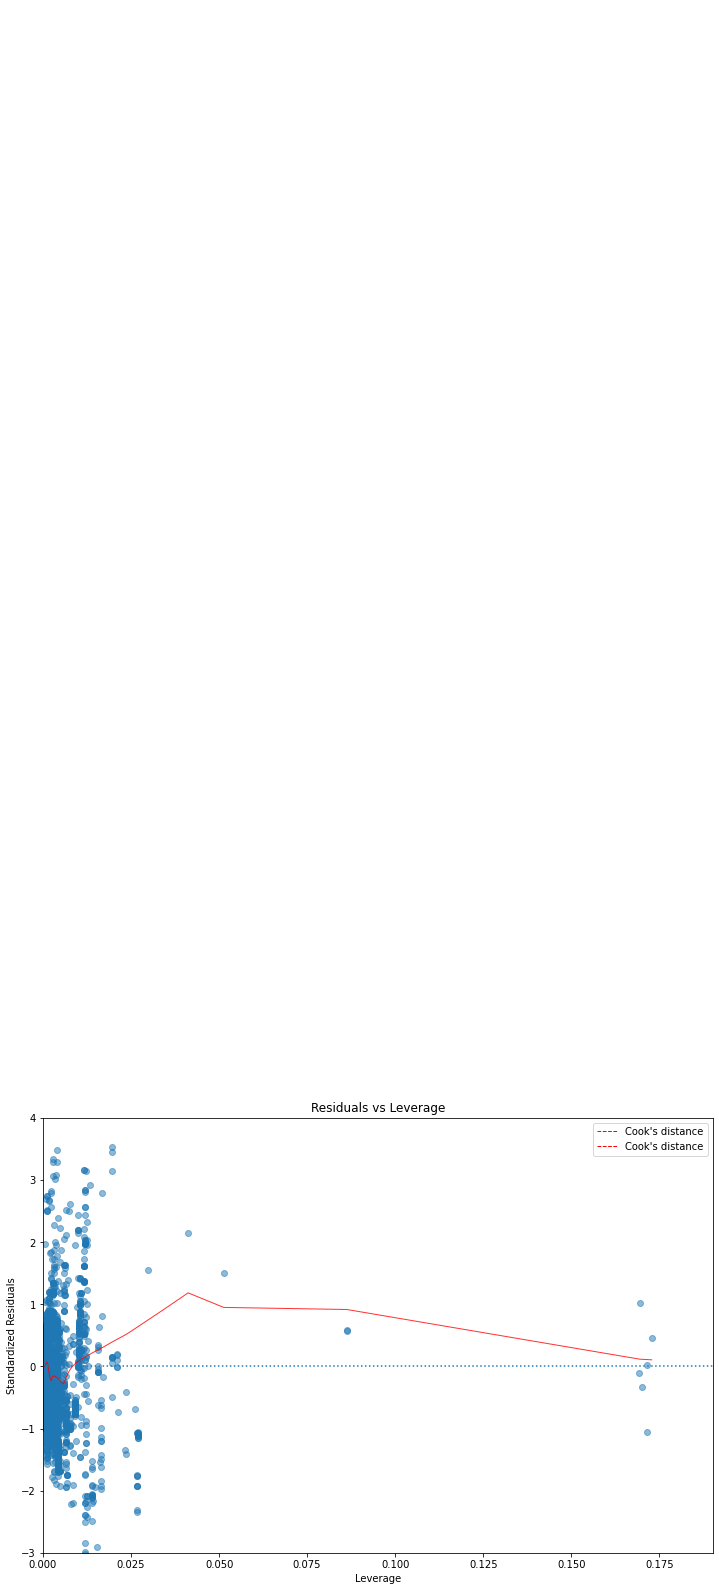

In [ ]:
graph_plotter.plot_influence()

*Fator de inflação da variância*

In [ ]:
pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const                  1.000000
DIAMETRO_NOMINAL       3.284817
CLASSE_PRESSAO         5.437323
material_corp         37.641943
material_int           1.458198
acab_face_flange       6.392511
adapta_corpo_tampa     2.409309
class_mat_corpo       50.731965
extrem_conex           3.938085
fx_diametro            2.456649
forma_haste            8.742430
padrao_fabrica        10.162132
req_suplement          5.219648
tipo_acionador         1.771123
tipo_obturador         1.015825
dtype: float64

*Gráfico de regressão parcial ou de variável agregada*

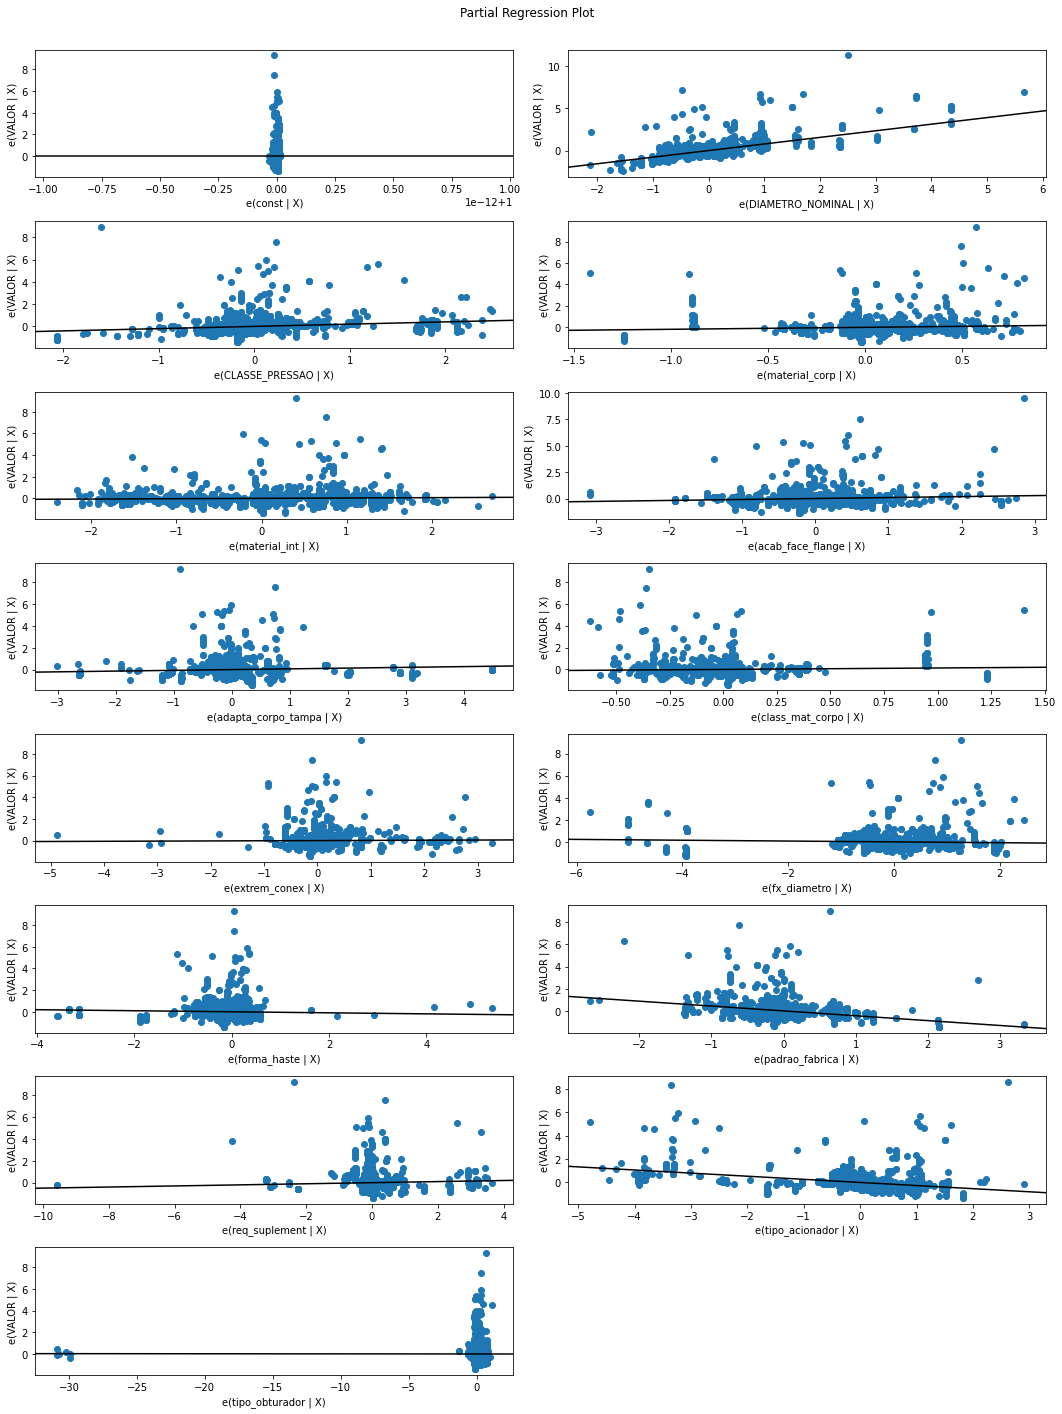

In [ ]:
fig = plt.figure(figsize=(15, 20))
sm.graphics.plot_partregress_grid(model1, fig=fig);

<font color='green'>Pelos gráficos acima, vemos muitas variáveis que podem não estar agregando ao modelo pois seus gráficos estão praticamente na horizontal. Pelo p-valor observado, reforçamos a hipótese das variáveis "extrem_conex" e "tipo_obturador" serem não significante para o modelo, ou seja, p-valor superior a 0,05.

<font color='green'>Analisando a premissa de multicolinearidade através do cálculo da inflação da variância, vemos que os atributos "material_corp", "class_mat_corpo" e "padrao_fabrica" tem grande influência, em comparação com as demais variáveis do modelo. Acreditamos que elas podem ser explicadas por outras variáveis. Isso se confirma no gráfico de correlação. Porém os testes realizados com a retirada dessas variáveis não melhorou o modelo.

<font color='green'>Por esse motivo o modelo otimizado contará com a retirada apenas das variáveis "extrem_conex" e "tipo_obturador".

### <font color='green'>Modelo 1 - Otimizado</font>

*Carregando o modelo*

In [ ]:
data1_o = data
data1_o = data1_o.drop(['extrem_conex', 'tipo_obturador'], axis=1)

*Sumário do modelo*

In [ ]:
X = sm.add_constant(data1_o.drop('VALOR', axis=1))
y = data1_o['VALOR']
X.sample(5)

const  DIAMETRO_NOMINAL  ...  req_suplement  tipo_acionador
4448    1.0         -0.667452  ...      -0.330051        0.287495
5470    1.0         -0.750377  ...       2.868046       -2.145416
5480    1.0         -0.750377  ...       2.868046       -2.145416
5732    1.0         -0.667452  ...       2.868046        0.287495
3935    1.0          0.078869  ...      -0.330051        0.287495

[5 rows x 13 columns]

In [ ]:
model1_o = sm.OLS(y, X.astype(float)).fit()

In [ ]:
print(model1_o.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2085.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:44:56   Log-Likelihood:                -3326.8
No. Observations:                5746   AIC:                             6680.
Df Residuals:                    5733   BIC:                             6766.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.182e-16      0

### <font color='green'>Modelo 2</font>

*Carregando o modelo*

In [ ]:
data2 = data
X = sm.add_constant(data2.drop('VALOR', axis=1))
y = data2['VALOR']
X.sample(5)
model2 = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [ ]:
X = data2.loc[:,data2.columns != 'VALOR']  # Entrada
y = data2.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [ ]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2 = LinearRegression(normalize=True)
  model2.fit(X_train, y_train);
  y_pred = model2.predict(X_test) #inferência do teste
  return model2, y_pred
model2, y_pred = train_and_predict(X_train, y_train, X_test)

In [ ]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.8362070545716498
R2 ajustado:  0.8341867010597582


*Equação de R ajustado*

In [ ]:
model2.intercept_

-0.005102825675103951

In [ ]:
model2.coef_

array([ 0.78582438,  0.2029329 ,  0.16074247,  0.02546129,  0.07588533,
        0.06249719,  0.14100599,  0.01818298, -0.04549647, -0.03334414,
       -0.40543746,  0.02641144, -0.2536782 , -0.00277977])

In [ ]:
data2.head()

DIAMETRO_NOMINAL  CLASSE_PRESSAO  ...  tipo_acionador  tipo_obturador
0         -0.667452        0.800034  ...        0.287495        0.032331
1         -0.667452        0.800034  ...        0.287495        0.032331
2         -0.667452        0.800034  ...        0.287495        0.032331
3         -0.667452        0.800034  ...        0.287495        0.032331
4         -0.667452        0.800034  ...        0.287495        0.032331

[5 rows x 15 columns]

*Previsto x realizado*

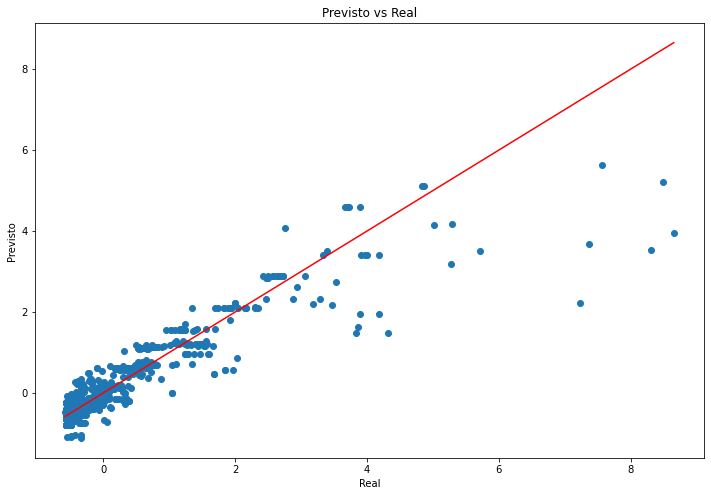

In [ ]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

*Carregando o modelo*

### <font color='green'>Modelo 2 - Otimizado</font>

*Carregando o modelo*

In [ ]:
data2_o = data
data2_o = data2_o.drop(['extrem_conex', 'tipo_obturador'], axis=1)
data2_o.drop(1289)
X = sm.add_constant(data2_o.drop('VALOR', axis=1))
y = data2_o['VALOR']
X.sample(5)
model2_o = sm.OLS(y, X.astype(float)).fit()
from sklearn.model_selection import train_test_split 

*Fazendo a separação do modelo*

In [ ]:
X = data2_o.loc[:,data2_o.columns != 'VALOR']  # Entrada
y = data2_o.VALOR    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Treino e teste

*Treinando o modelo*

In [ ]:
from sklearn.linear_model import LinearRegression
def train_and_predict(X_train, y_train, X_test):
  model2_o = LinearRegression(normalize=True)
  model2_o.fit(X_train, y_train);
  y_pred = model2_o.predict(X_test) #inferência do teste
  return model2_o, y_pred
model2_o, y_pred = train_and_predict(X_train, y_train, X_test)

In [ ]:
def evaluate(y_test, y_pred, X_test):  
  # R2
  from sklearn.metrics import r2_score
  r2 = r2_score(y_test, y_pred)
  print('R2: ', r2)
  n = len(y_test)
  p = X_test.shape[1]
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  print('R2 ajustado: ', adj_r2)
evaluate(y_test, y_pred, X_test)

R2:  0.793489493369671
R2 ajustado:  0.791309962956686


*Equação de R ajustado*

In [ ]:
model2_o.intercept_

0.002738527407063587

In [ ]:
model2_o.coef_

array([ 0.76052621,  0.21201613,  0.16273591,  0.03231068,  0.07959734,
        0.08071508,  0.16183376, -0.03084635, -0.05723656, -0.47798961,
        0.07905813, -0.28802629])

In [ ]:
data2_o.head()

DIAMETRO_NOMINAL  CLASSE_PRESSAO  ...  req_suplement  tipo_acionador
0         -0.667452        0.800034  ...      -0.330051        0.287495
1         -0.667452        0.800034  ...      -0.330051        0.287495
2         -0.667452        0.800034  ...      -0.330051        0.287495
3         -0.667452        0.800034  ...      -0.330051        0.287495
4         -0.667452        0.800034  ...      -0.330051        0.287495

[5 rows x 13 columns]

*Previsto x realizado*

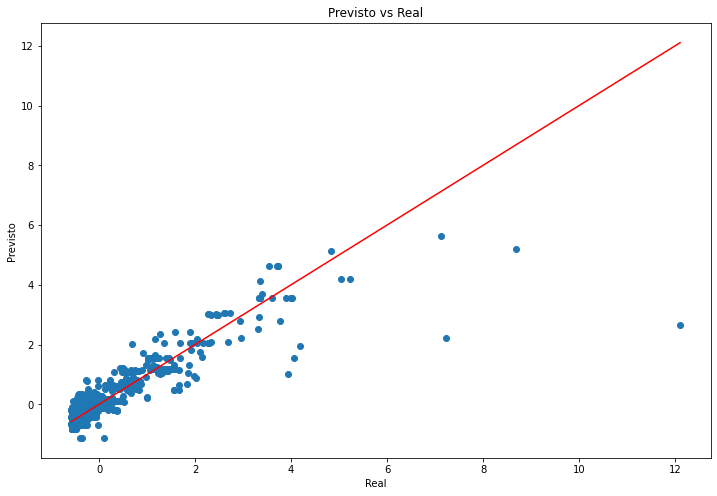

In [ ]:
plt.scatter(x=y_test, y=y_pred)
plt.title('Previsto vs Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [min(y_test), max(y_test)]
plt.plot(x, x, color='red'); #reta onde y=x

## <font color='blue'>Modelo de regressão múltipla polinomial</font>
===================================================================================================================

### <font color='green'>Modelo 3</font>

*Carregando o modelo*

In [ ]:
data3 = data
data3 = data3.drop(['extrem_conex', 'tipo_obturador'], axis=1)

*Polinomial de 2ª ordem*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
polynomial_features = PolynomialFeatures(degree=2)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(5746, 91)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1300.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:45:00   Log-Likelihood:                 686.02
No. Observations:                5746   AIC:                            -1190.
Df Residuals:                    5655   BIC:                            -584.3
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4613      0.305     -1.510      0.1

*Polinomial de 3ª ordem*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(5746, 455)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1619.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:45:01   Log-Likelihood:                 4364.8
No. Observations:                5746   AIC:                            -8206.
Df Residuals:                    5484   BIC:                            -6462.
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7893      1.094     -4.376      0.0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(5746, 1820)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1662.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:45:15   Log-Likelihood:                 5521.6
No. Observations:                5746   AIC:                        -1.029e+04
Df Residuals:                    5371   BIC:                            -7797.
Df Model:                         374                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -235.8907    249.386     -0.946      0.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
xpoly = polynomial_features.fit_transform(X)
xpoly.shape

(5746, 6188)

In [ ]:
model3 = sm.OLS(y, xpoly).fit()
ypred = model3.predict(xpoly) 
ypred.shape
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1526.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:50:08   Log-Likelihood:                 5825.2
No. Observations:                5746   AIC:                        -1.075e+04
Df Residuals:                    5298   BIC:                            -7772.
Df Model:                         447                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.168e+06   9.15e+07      0.013      0.9

In [ ]:
import altair as alt

x = y_test
y = y_pred
source = pd.DataFrame({"x": x, "y": y})

degree_list = [1, 2, 3, 4, 5]

base = alt.Chart(source).mark_circle(color="black").encode(
        alt.X("x"), alt.Y("y")
)

polynomial_fit = [
    base.transform_regression(
        "x", "y", method="poly", order=order, as_=["x", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "y"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)